<div style="padding:10px;background-color: #FF4D4D; color:white;font-size:28px;"><strong>Matplotlib</strong></div>

Por convención, importamos matplotlib como `plt` (nótese la instrucción de importación específica a continuación).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Empecemos cargando algunos datos para comenzar a graficar. Veamos un conjunto de datos sobre salarios a lo largo del tiempo. Estos datos pertenecen a la Bureau of Labor Statistics y reflejan salarios semanales en dólares estadounidenses, sin ajustar por inflación.

In [5]:
Sal = pd.read_csv('../data/salarios.csv')

In [6]:
Sal.head()

,year,less_than_high_school,high_school,some_college,college_degree,advanced_degree,all_workers
0,2000,365,503,590,825,997,573
1,2001,377,512,607,854,1047,589
2,2002,389,533,630,881,1060,611
3,2003,397,549,635,903,1104,620
4,2004,396,562,649,926,1149,634


In [7]:
Sal = Sal.set_index('year')

In [8]:
Sal.head()

,less_than_high_school,high_school,some_college,college_degree,advanced_degree,all_workers
year,,,,,,
2000,365,503,590,825,997,573
2001,377,512,607,854,1047,589
2002,389,533,630,881,1060,611
2003,397,549,635,903,1104,620
2004,396,562,649,926,1149,634


## <a style="padding:3px;color: #FF4D4D; "><strong>Figuras y Ejes</strong></a>

Es importante conocer la diferencia entre Figuras (Figures) y Ejes (Axes) en un gráfico. 

Una *Figura* es el contenedor exterior de un gráfico, que puede incluir uno o más objetos llamados Ejes.

Podemos crear una *Figura* por sí sola de la siguiente manera. Sin embargo, no veremos nada porque inicialmente la figura no contiene ningún *Eje*.

In [11]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Para hacer una gráfica, primero tenemos que agregar subgráficos.

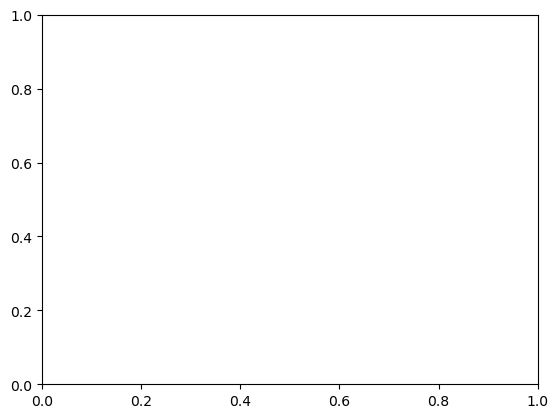

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

Podemos comprobar que el objeto de subgráfico es de tipo AxesSubplot, que es una clase de objeto Eje.

In [15]:
type(ax)

matplotlib.axes._axes.Axes

El objeto se llama Eje (Axes) porque contiene un eje x y un eje y. (Por eso suena de forma confusa como un sustantivo plural, aunque en realidad se trata de un solo Eje).

Los argumentos de `add_subplot` representan:

`número de filas de subgráficos, el número de columnas de subgráficos, subgráfico que estamos creando`. 

Aquí hay un ejemplo para crear una cuadrícula de 2 por 2.

<Axes: >

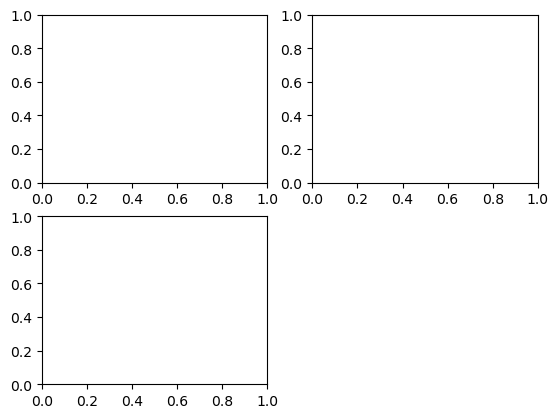

In [17]:
fig = plt.figure()
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)

Para controlar el tamaño general de la Figura, usamos el argumento `figsize`.

<Axes: >

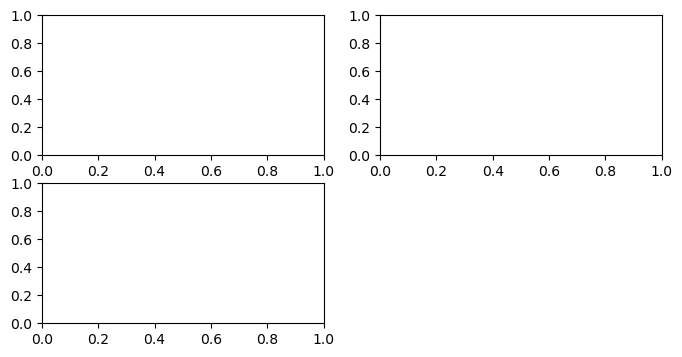

In [19]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)

Si trazamos con un comando como `plt.plot(...)`, nuestra gráfica aparecerá en el último Eje que hayamos creado.

(array([2., 3., 1., 2., 1., 3., 2., 2., 1., 2.]),
 array([573. , 603.8, 634.6, 665.4, 696.2, 727. , 757.8, 788.6, 819.4,
        850.2, 881. ]),
 <BarContainer object of 10 artists>)

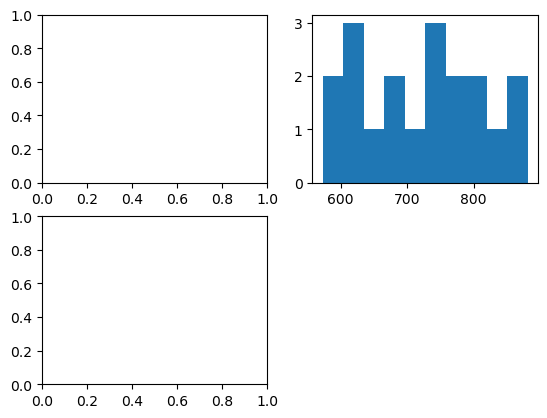

In [21]:
fig = plt.figure()
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,3)
fig.add_subplot(2,2,2)
plt.hist(Sal.all_workers)

Advertencia: Las gráficas se reinician al final de una celda del cuaderno, por lo que debemos poner todos los comandos para una gráfica en una sola celda, incluso si es una figura muy compleja con muchos subgráficos.

Si almacenamos un nombre para cada Eje, luego podemos agregar gráficas usando los métodos de instancia de cada uno.

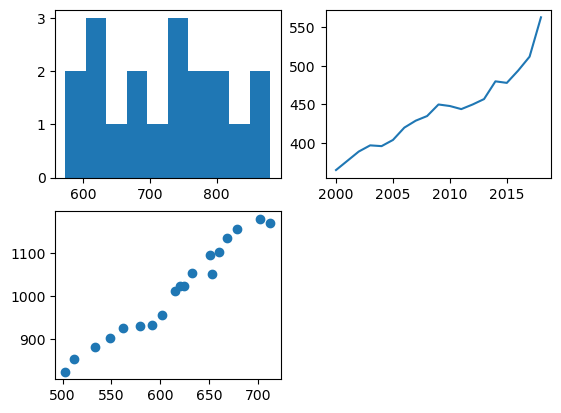

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(Sal.all_workers)
ax2.plot(Sal.less_than_high_school)
ax3.scatter(Sal.high_school, Sal.college_degree)

Por conveniencia, Matplotlib tiene una función para crear una Figura y una cuadrícula de Ejes automáticamente. Esto puede hacer que nuestro código se vea un poco más ordenado.

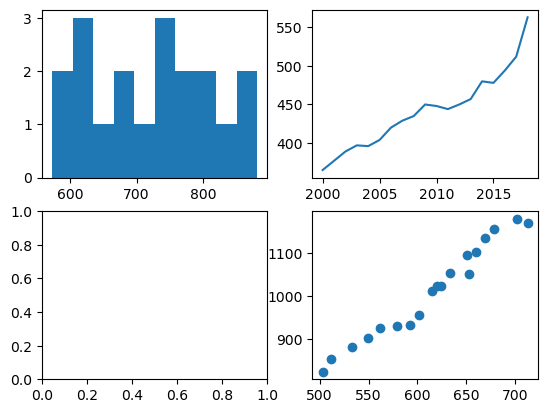

In [25]:
fig, ax = plt.subplots(2,2)

ax[0][0].hist(Sal.all_workers)
ax[0][1].plot(Sal.less_than_high_school)
ax[1][1].scatter(Sal.high_school, Sal.college_degree)

Dos argumentos importantes cuando tenemos múltiples gráficas son sharex y sharey. Si los establecemos en True, Python se asegurará de que las gráficas usen la misma escala. De lo contrario, el rango de cada Eje se ajustará de manera independiente. Aquí tenemos un ejemplo donde queremos comparar si las enfermedades cardíacas y hepáticas están relacionadas con el consumo de alcohol. Primero, lo intentaremos sin sharex.

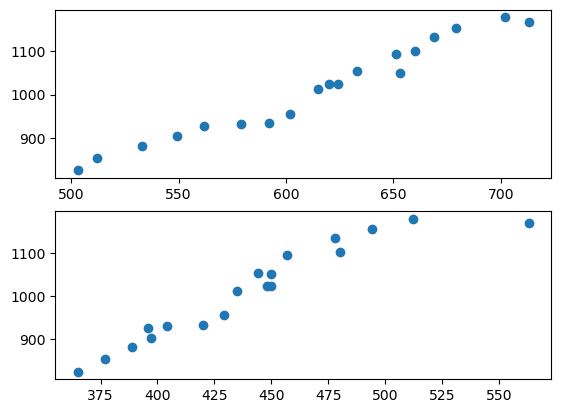

In [27]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Sal.high_school, Sal.college_degree)
ax[1].scatter(Sal.less_than_high_school, Sal.college_degree)

Podemos ver que los ejes x no se alinean. (Esto se debe en realidad a que nos aseguramos de que haya un valor faltante en los datos). Podemos corregir esto utilizando sharex.

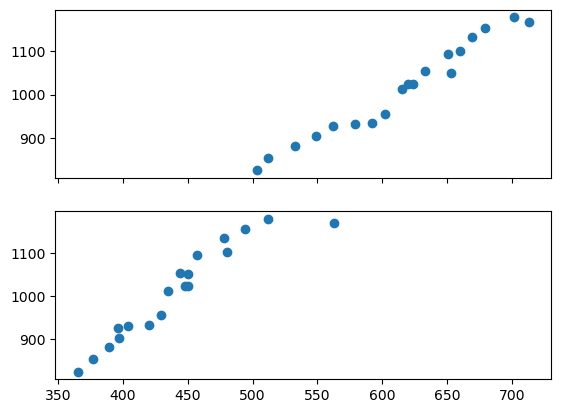

In [29]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(Sal.high_school, Sal.college_degree)
ax[1].scatter(Sal.less_than_high_school, Sal.college_degree)

## <a style="padding:3px;color: #FF4D4D; "><strong>Colores y Líneas</strong></a>

Una vez vista la estructura básica de los gráficos con `matplotlib`, revisaremos cómo darles formato.

Iniciemos con una gráfica en el tiempo de los salarios de todos los trabajadores.

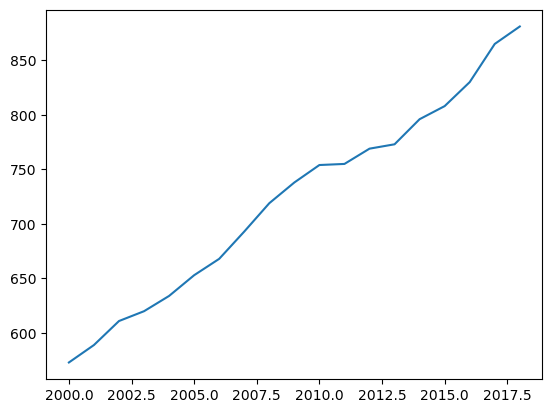

In [32]:
plt.plot(Sal.all_workers)

Si graficamos múltiples líneas en un solo Eje, conviene modificar los colores utilizando el argumento color. Podemos usar el nombre de un color común o un color arbitrario en notación hexadecimal.

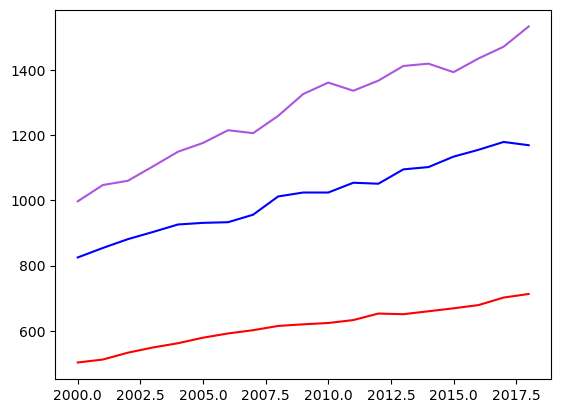

In [34]:
plt.plot(Sal.high_school, color = 'red')
plt.plot(Sal.college_degree, color = 'b')
plt.plot(Sal.advanced_degree, color = '#aa55dd')

Para hacer que una línea sea [punteada o discontinua](https://www.geeksforgeeks.org/linestyles-in-matplotlib-python/), usamos el argumento [linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html). Esto mejora la accesibilidad para personas con daltonismo.

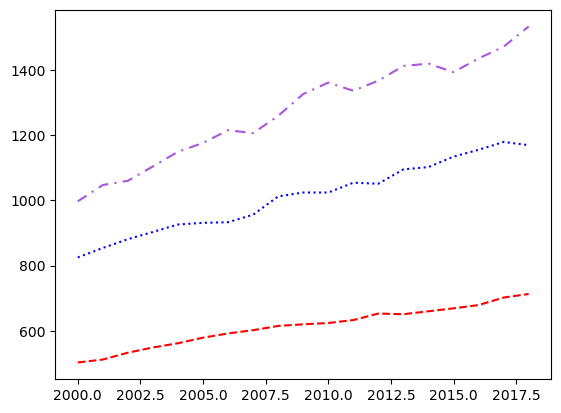

In [36]:
plt.plot(Sal.high_school, color = 'red', linestyle = '--')
plt.plot(Sal.college_degree, color = 'b', linestyle = ':')
plt.plot(Sal.advanced_degree, color = '#aa55dd', linestyle = (0,(5,3,1,3))) ## (offset, (linea,espacio))

Otra forma de mejorar la accesibilidad es usar diferentes [marcadores](https://matplotlib.org/stable/api/markers_api.html) para cada punto de datos.

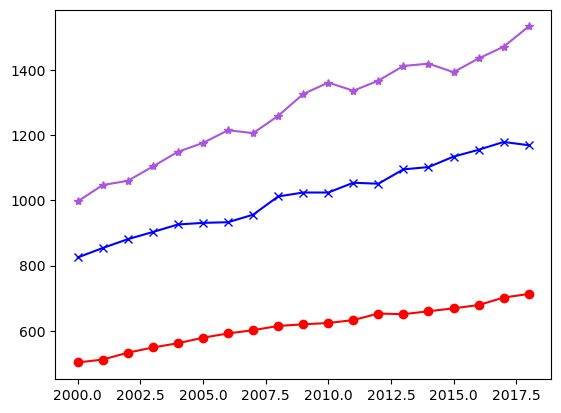

In [38]:
plt.plot(Sal.high_school, color = 'red', marker = "o")
plt.plot(Sal.college_degree, color = 'b', marker = "x")
plt.plot(Sal.advanced_degree, color = '#aa55dd', marker = "*")

## <a style="padding:3px;color: #FF4D4D; "><strong>Leyenda</strong></a>

Para agregar una leyenda, podemos usar `plt.legend()`. Aunque las etiquetas pueden colocarse en automático, podemos también indicarle a Python qué etiqueta corresponde a cada elemento. Hacemos esto pasando un argumento `label` cada vez que añadimos una característica a la gráfica. La leyenda buscará estos atributos label al graficar.

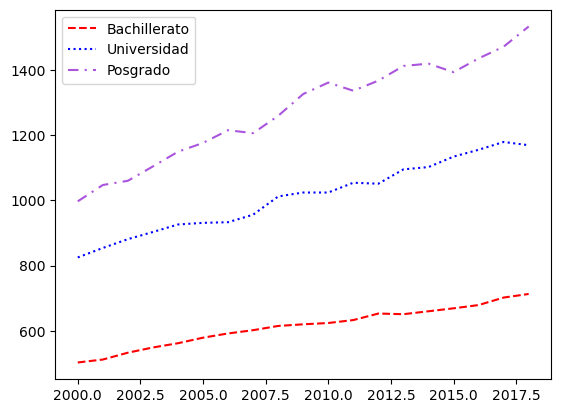

In [42]:
plt.plot(Sal.high_school, color = 'red', linestyle = '--', label = 'Bachillerato')
plt.plot(Sal.college_degree, color = 'b', linestyle = ':', label = 'Universidad')
plt.plot(Sal.advanced_degree, color = '#aa55dd', linestyle = (0,(5,3,1,3)), label = 'Posgrado')
plt.legend()

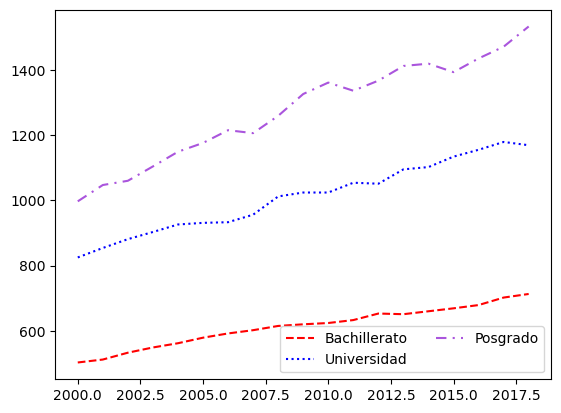

In [43]:
plt.plot(Sal.high_school, color = 'red', linestyle = '--', label = 'Bachillerato')
plt.plot(Sal.college_degree, color = 'b', linestyle = ':', label = 'Universidad')
plt.plot(Sal.advanced_degree, color = '#aa55dd', linestyle = (0,(5,3,1,3)), label = 'Posgrado')
plt.legend(loc = 'lower right', ncol = 2)

## <a style="padding:3px;color: #FF4D4D; "><strong>Colormap</strong></a>

Si solo tenemos dos o tres líneas que graficar (y una cierta sensibilidad artística), podemos simplemente elegir los colores manualmente. Pero si tenemos muchas líneas, esto se vuelve complicado. Una estrategia que podemos usar en ese caso es recurrir a un [mapa de colores](https://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html).

En Python, un colormap es un objeto que toma valores entre 0 y 1 y los asigna a distintos colores. Podemos crear uno propio o utilizar alguno de los muchos que ya vienen integrados.

Vamos a continuar usando el mapa de colores gnuplot. A continuación mostramos cómo obtener un solo color de ese mapa.

In [46]:
mapa = plt.cm.gnuplot
mapa(.5)

(0.7084919084320762, 0.12647636278656021, 0.0, 1.0)

Al pasarle el argumento `.5`, le estamos pidiendo el color que se encuentra a la mitad del mapa. 

El color que obtenemos de un colormap está en formato RGBA: rojo, verde, azul y alfa. El valor alfa se refiere a la opacidad.

Para nuestra gráfica, necesitaremos varios colores, así que usaremos un arreglo de números entre cero y uno.

In [48]:
colormap = plt.cm.gnuplot
colores = [colormap(i) for i in np.linspace(0.1, 0.9, Sal.shape[1])]
colores

[(0.3131121455425747, 0.0009423223345470445, 0.5777738314082511, 1.0),
 (0.5087470190691683, 0.01733848972114797, 0.9984636039674339, 1.0),
 (0.6477714435950808, 0.07388066429955296, 0.4839114241003016, 1.0),
 (0.7618347306750625, 0.19550803235557962, 0.0, 1.0),
 (0.8609160647753271, 0.40715978017504584, 0.0, 1.0),
 (0.9497161598676341, 0.7337750940437691, 0.0, 1.0)]

Queremos graficar todas las variables de nuestro DataFrame (excepto all_workers). Una forma sencilla de hacerlo es usar el método plot que proporciona el propio DataFrame. Vamos a pasar nuestros colores utilizando el argumento `color`.

<Axes: xlabel='year'>

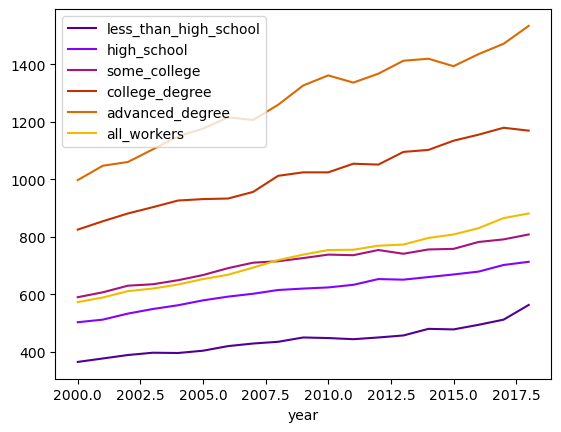

In [50]:
Sal.plot(color = colores)

Este método es excelente cuando estamos explorando, pero no ofrece mucha flexibilidad en cuanto a colores, estilos de línea, etc.

Para crear una gráfica de calidad de publicación, normalmente utilizo un bucle for para agregar líneas una por una.

Una buena estrategia es configurar diccionarios para los colores, estilos de línea, etiquetas o algún otro [parámetro de la lista de gráficos de línea](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), y usar estos a lo largo de un análisis para asegurarme de que los colores coincidan.

In [52]:
# shape - 1 porque all_workers será distinto
grises = [plt.cm.binary(i) for i in np.linspace(0.3, 0.6, Sal.shape[1] - 1)]
grises

[(0.7019607843137254, 0.7019607843137254, 0.7019607843137254, 1.0),
 (0.6235294117647059, 0.6235294117647059, 0.6235294117647059, 1.0),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 1.0),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686, 1.0),
 (0.4, 0.4, 0.4, 1.0)]

In [53]:
dictLabel = {'less_than_high_school': 'Sin Bachillerato', 
             'high_school': 'Bachillerato',
             'some_college': 'Universidad Trunca',
             'college_degree': 'Universidad',
             'advanced_degree': 'Posgrado',
             'all_workers': 'Todos los trabajadores' 
            }

dictLinestyle = {'less_than_high_school': (0,(10,1)), 
             'high_school': (0,(8,1)),
             'some_college': (0,(6,1)),
             'college_degree': (0,(4,1)),
             'advanced_degree': (0,(2,1)),
             'all_workers': (0,())
            }

dictColor = dict(zip(['less_than_high_school', 
             'high_school',
             'some_college',
             'college_degree',
             'advanced_degree',
             'all_workers'], grises + ["cornflowerblue"]))

dictAncho = dict(zip(['less_than_high_school', 
             'high_school',
             'some_college',
             'college_degree',
             'advanced_degree',
             'all_workers'], [1] * 5 + [4]))

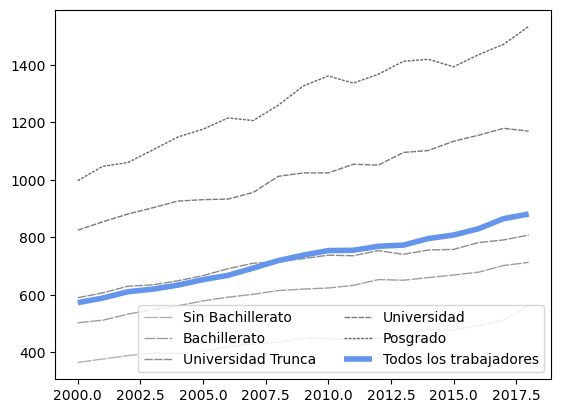

In [54]:
for var in Sal.columns:
    plt.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
plt.legend(loc = 'lower right', ncol = 2)

En términos generales, hay dos estilos que podemos usar con Matplotlib.

El primero es un estilo procedimental, que utiliza muchos métodos de nivel superior de `plt`: `plt.plot`, `plt.legend(loc = 'lower right', ncol = 2)`, y así sucesivamente. La celda anterior es un buen ejemplo de este estilo. Podemos ver que es bastante compacto y permite generar gráficas rápidamente.

El segundo estilo es más orientado a objetos. Para usar este enfoque, comenzamos creando explícitamente variables que hagan referencia a una Figura y un Eje. Luego, llamamos a métodos sobre estas instancias. Aquí mostramos un ejemplo donde reorganizamos la celda anterior para que sea más orientada a objetos.

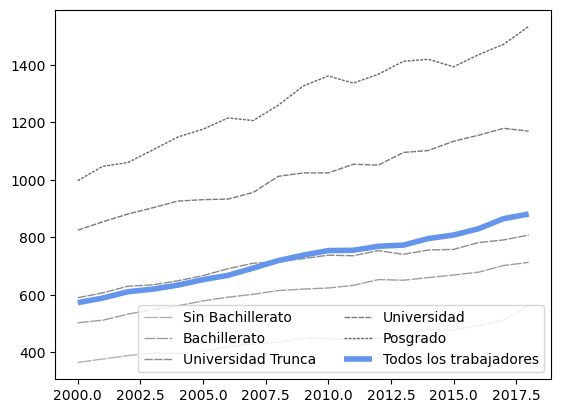

In [56]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.legend(loc = 'lower right', ncol = 2)

En este caso, no hay mucha diferencia, pero para gráficas realmente complejas, puede que tengamos que usar el estilo orientado a objetos, ya que hay cosas que el estilo procedimental no puede hacer. Por lo que conviene más aprender a usarlo desde este momento.

## <a style="padding:3px;color: #FF4D4D; "><strong>Título</strong></a>

Para agregar un título, usamos `Axes.set_title()`. En el estilo más procedimental, se puede llamar a `plt.title()`.

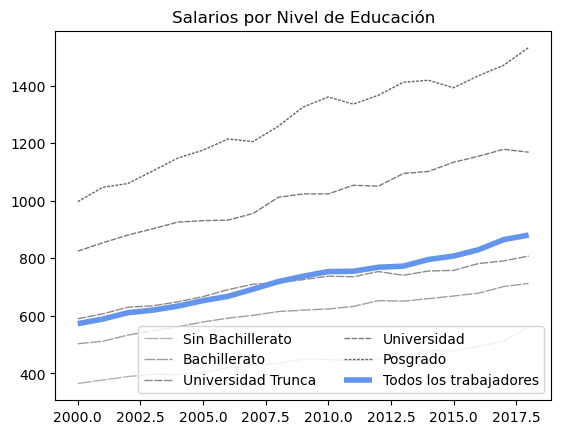

In [60]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación')
ax.legend(loc = 'lower right', ncol = 2)

Si queremos dar [formato](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) a nuestro título primero necesitamos establecer un `fontdict`, es decir un diccionario que controla la apariencia del texto.

In [128]:
fontTit = {'family':'serif','color':'cornflowerblue','size': 16, 'fontweight': 'bold'}

Posteriormente, podemos pasar nuestro diccionario junto con otros parámetros al método `Axes.set_title()` 

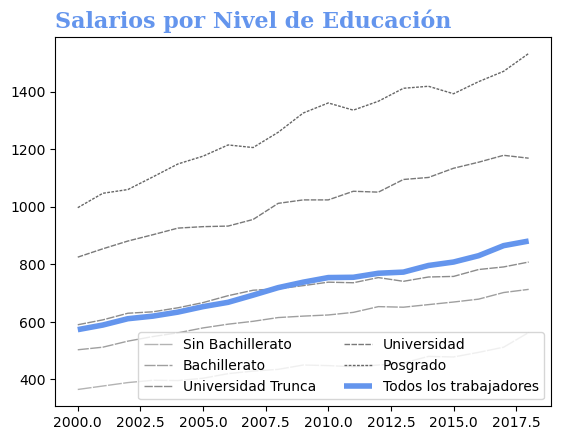

In [64]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.legend(loc = 'lower right', ncol = 2)

## <a style="padding:3px;color: #FF4D4D; "><strong>Ejes</strong></a>

Pensemos ahora en los ejes `x` y `y`. 

A veces está bien que el eje `y` no comience en cero. Sin embargo, en este caso, el cero es el punto de referencia más natural para comparar la magnitud de los salarios. 

Comenzar en 300 hace que las líneas parezcan más inclinadas y también las separa más entre sí. Esto puede engañar a nuestro sistema visual y hacernos pensar que las diferencias entre niveles educativos son más dramáticas de lo que realmente son. No es un error grave, pero sí un ejemplo de cómo se puede distorsionar la interpretación de los datos. Por eso, cambiemos el eje y para que comience en cero. Esto se hace con el método `Axes.set_ylim()` (o llamando a `plt.ylim()`).

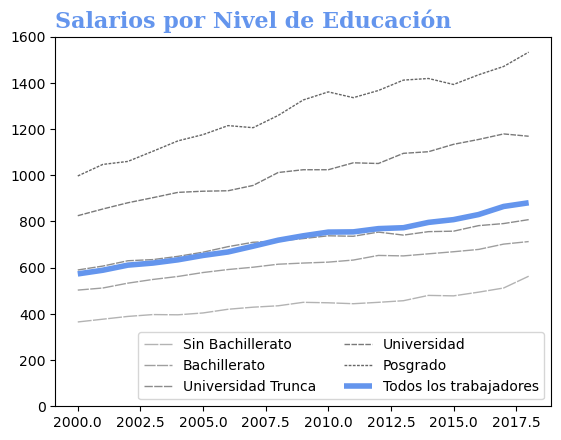

In [67]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.legend(loc = 'lower right', ncol = 2)

A continuación, mejoremos los números a lo largo del eje `x`. 

Usamos `Axes.set_xticklabels()` para modificar las etiquetas. Si queremos cambiar la posición de las marcas (ticks), usamos `Axes.set_xticks()`

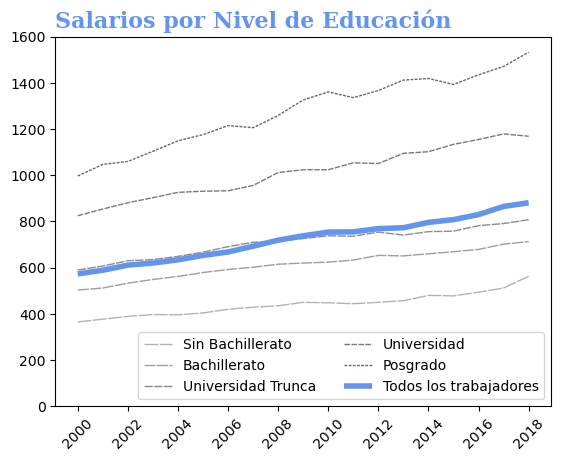

In [69]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     # Nueva línea
ax.set_xticklabels(range(2000, 2019,2), rotation = 45) # Nueva línea
ax.legend(loc = 'lower right', ncol = 2)

Podemos agregar una etiqueta para el eje y con su propio formato

In [71]:
fontEti = {'family':'serif','color':'cornflowerblue','size': 10, 'fontweight': 'bold'}

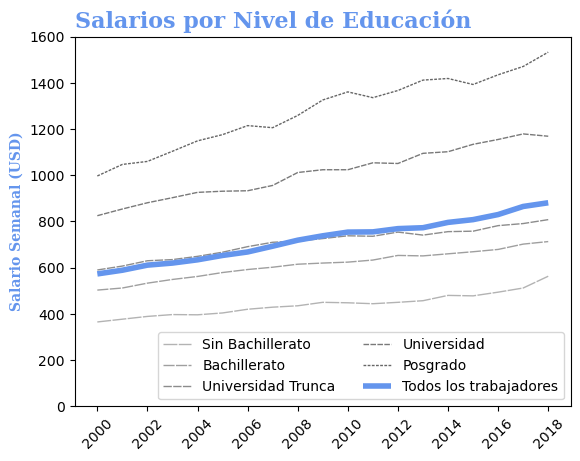

In [72]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     
ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Salario Semanal (USD)', fontdict = fontEti)                # Nueva línea
ax.legend(loc = 'lower right', ncol = 2)

Podríamos querer agregar un signo de dólar a los valores en dólares. Para tener este tipo de control detallado, definimos un formatter. Esta funcionalidad está disponible en el módulo `matplotlib.ticker`.

In [74]:
import matplotlib.ticker as mtick
fmoneda = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmoneda)  # Cambia el formato de marcas

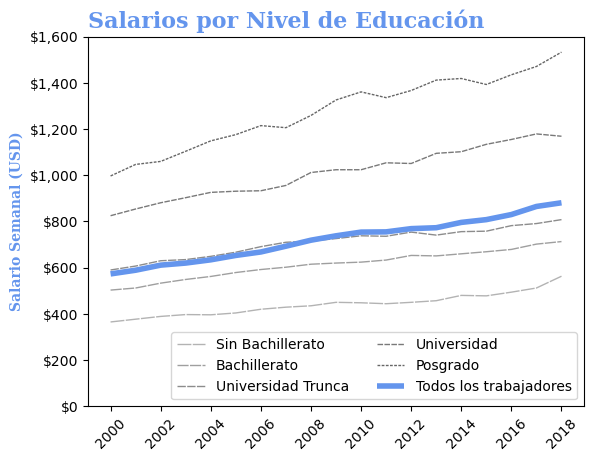

In [75]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     
ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Salario Semanal (USD)', fontdict = fontEti)              
ax.yaxis.set_major_formatter(tick) 
ax.legend(loc = 'lower right', ncol = 2)

## <a style="padding:3px;color: #FF4D4D; "><strong>Anotaciones</strong></a>

Finalmente, podemos agregar anotaciones a la figura.

Para agregar texto, `Axes.text()` recibe una coordenada en `x`, una coordenada en `y` y una cadena de texto. Por defecto, las coordenadas corresponden a valores de las variables `x` e `y`.

Text(2008, 1100, 'Crisis\nHipotecaria')

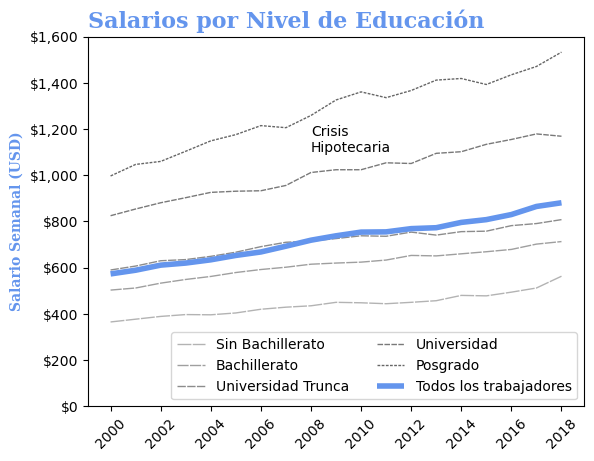

In [78]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     
ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Salario Semanal (USD)', fontdict = fontEti)              
ax.yaxis.set_major_formatter(tick) 
ax.legend(loc = 'lower right', ncol = 2)
ax.text(2008,1100,'Crisis\nHipotecaria')      # Nueva línea

Una anotación, creada con `Axes.annotate()`, consiste en un texto y una flecha. El argumento `xy` indica el lugar en la gráfica al que debe apuntar la flecha, mientras que `xytext` indica el lugar donde se colocará el texto.

Text(2008, 1509, 'Crisis Hipotecaria')

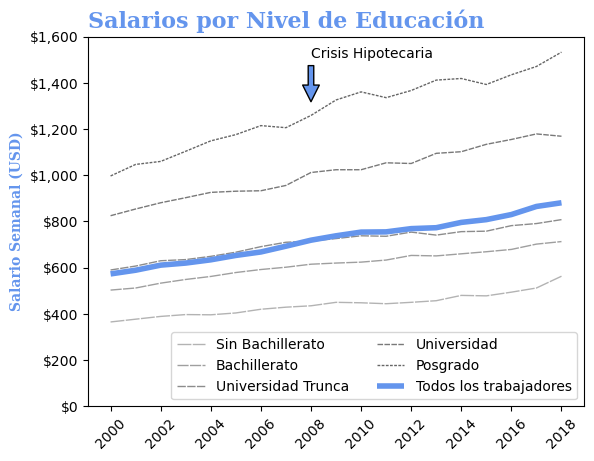

In [80]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     
ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Salario Semanal (USD)', fontdict = fontEti)              
ax.yaxis.set_major_formatter(tick) 
ax.legend(loc = 'lower right', ncol = 2)
ax.annotate("Crisis Hipotecaria", xy = (2008, Sal.advanced_degree[2008] + 50),  # Nueva línea 
            xytext = (2008, Sal.advanced_degree[2008]+250),
            arrowprops = dict(facecolor='cornflowerblue', shrink=0.05))

Una vez terminado un gráfico podemos guardarlo haciendo uso del método `savefig`

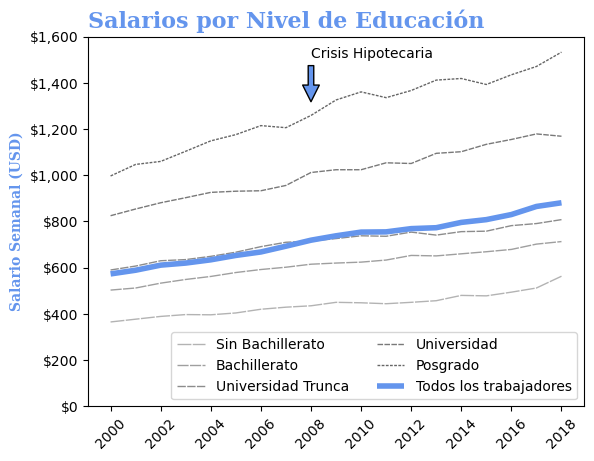

In [82]:
fig, ax = plt.subplots(1,1)
for var in Sal.columns:
    ax.plot(Sal[var], label = dictLabel[var], color = dictColor[var], 
             linestyle = dictLinestyle[var], linewidth = dictAncho[var])
ax.set_title('Salarios por Nivel de Educación', fontdict = fontTit, loc = 'left')
ax.set_ylim((0,1600))
ax.set_xticks(range(2000, 2019,2))                     
ax.set_xticklabels(range(2000, 2019,2), rotation = 45)
ax.set_ylabel('Salario Semanal (USD)', fontdict = fontEti)              
ax.yaxis.set_major_formatter(tick) 
ax.legend(loc = 'lower right', ncol = 2)
ax.annotate("Crisis Hipotecaria", xy = (2008, Sal.advanced_degree[2008] + 50),  # Nueva línea 
            xytext = (2008, Sal.advanced_degree[2008]+250),
            arrowprops = dict(facecolor='cornflowerblue', shrink=0.05))

fig.savefig('salarios.png', bbox_inches = 'tight') # Nueva línea